# MIDTERM PROJECT - Data Analysis using Python
**Dataset:** Seaborn 'tips'  
**Author:** [Your Name]  
**Date:** October 2025  

#PART 1: IMPORT LIBRARIES & LOAD DATAET
we import the necessary libraries and load a
built-in dataset from seaborn called 'tips', which contains
nformation about restaurant bills, tips, and customer attributes.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# PART 2: DATA CLEANING AND WRANGLING

Steps:
1. Inspect data types
2. Check for missing values
3. Handle missing/invalid entries
4. Check duplicates
5. outlier check
6. Document cleaning actions

In [57]:
print(df.dtypes)
#df.info()
print("\nMissing Values:\n", df.isnull().sum())
df = df.dropna()
print(df.duplicated())
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum().sum()
print(f"\nNumber of potential outliers: {outliers}")

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

Number of duplicate rows: 1

Number of potential outliers: 11


# Cleaning summary
No missing values found.
No duplicates.
Data types are appropriate.
Outliers were inspected but not removed since they represent natural variation.

#PART 3: MEASURES OF CENTRAL TENDENCY

In [58]:
# Q1: What is the average total bill?
mean_bill = df['total_bill'].mean()

# Q2: What is the median tip amount?
median_tip = df['tip'].median()

# Q3: What is the most common day of the week for dining?
mode_day = df['day'].mode()[0]

print(f"Mean Total Bill: {mean_bill:.2f}")
print(f"Median Tip: {median_tip:.2f}")
print(f"Mode Day: {mode_day}")

Mean Total Bill: 19.81
Median Tip: 2.92
Mode Day: Sat


# Demonstration and Interpretation:
mean,median and mode can be calculated using builtin modules in pandas
Customers spend on average around 19.81 dollars per bill with a median tip of 2.92 dollars
Saturday is the most common dining day.


#PART 4: MEASURES OF SPREAD
1. Q1: What is the standard deviation of total bills?
2. Q2: What is the range of tip amounts?

In [59]:
std_bill = df['total_bill'].std()
range_tip = df['tip'].max() - df['tip'].min()
print(f"Standard Deviation of Total Bill: {std_bill:.2f}")
print(f"Range of Tip Amounts: {range_tip:.2f}")

Standard Deviation of Total Bill: 8.91
Range of Tip Amounts: 9.00


# Interpretation:
Total bills vary by about 8.91 dollars on average from the mean,
and tip amounts range from 1 dollar to about 10 dollars.

# PART 5: PAIRPLOT
 We'll visualize relationships between key quantitative columns.

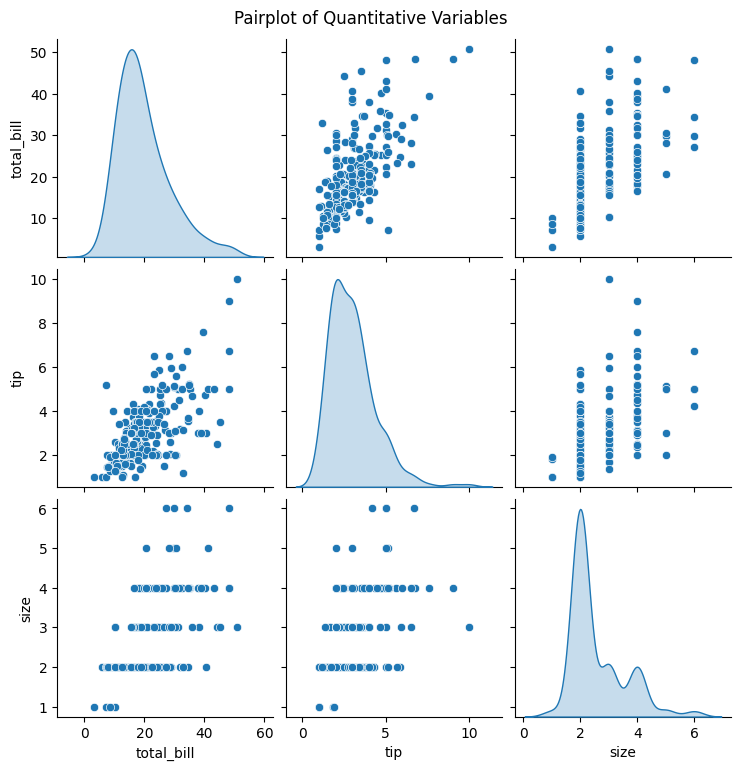

In [60]:
sns.pairplot(df[['total_bill', 'tip', 'size']], diag_kind='kde')
plt.suptitle("Pairplot of Quantitative Variables", y=1.02)
plt.show()

# Observation:
1. A positive correlation is visible between total_bill and tip.
2. Larger group sizes tend to result in higher total bills.

# PART 6: ADDITIONAL VISUALIZATIONS
Three distinct visualizations with questions and interpretations.

/tmp/ipython-input-1996537974.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bill_by_day = df.groupby('day')['total_bill'].mean().sort_values(ascending=False)


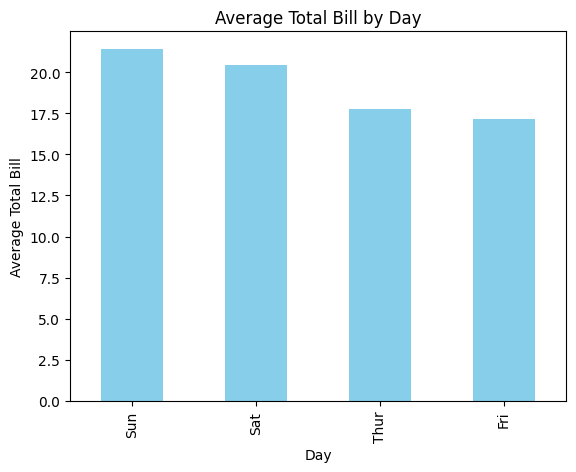

In [61]:
# 1.Bar Chart: Which day has the highest average total bill?
avg_bill_by_day = df.groupby('day')['total_bill'].mean().sort_values(ascending=False)
avg_bill_by_day.plot(kind='bar', color='skyblue', title='Average Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.show()

# Interpretation:
Sunday customers spend the most, followed by Saturday.

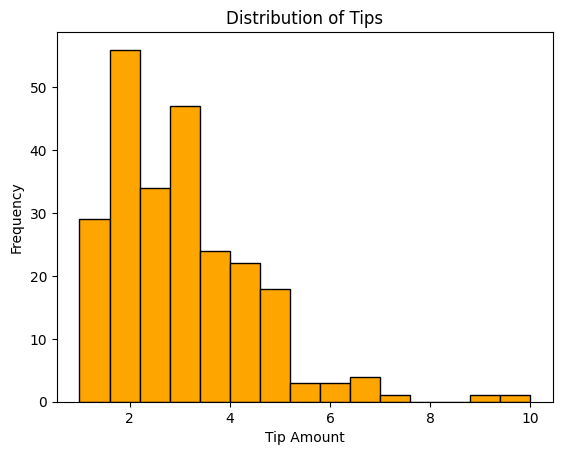

In [62]:
# 2. Histogram: Distribution of tips
plt.hist(df['tip'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

# Interpretation:
Most tips fall between 2 dollars and 4 dollars.

/tmp/ipython-input-1327768756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='total_bill', data=df, palette='pastel')


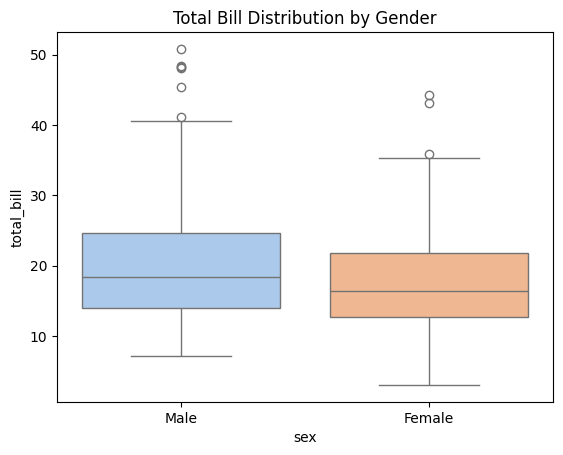

In [63]:
# 3. Box Plot: Total Bill distribution by Gender
sns.boxplot(x='sex', y='total_bill', data=df, palette='pastel')
plt.title('Total Bill Distribution by Gender')
plt.show()

# Interpretation:
Males tend to have slightly higher total bills than females.

#PART 7: SCATTERPLOT WITH LINEAR REGRESSION
We'll analyze the relationship between total_bill and tip.

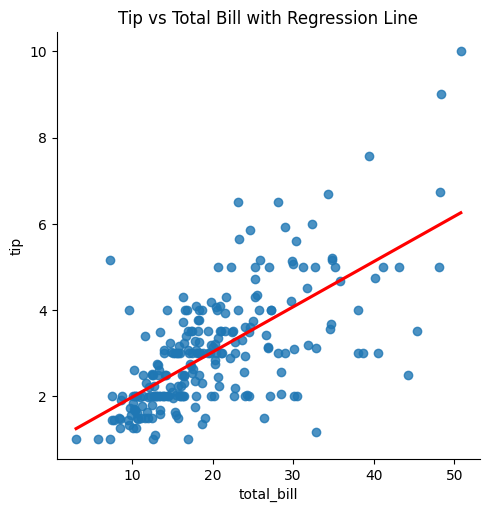

Correlation between Total Bill and Tip: 0.675
Regression Equation: tip = 0.10 * total_bill + 0.92
Predicted tip for $40 bill: 5.12


In [64]:
sns.lmplot(x='total_bill', y='tip', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Tip vs Total Bill with Regression Line')
plt.show()

corr = df['total_bill'].corr(df['tip'])
print(f"Correlation between Total Bill and Tip: {corr:.3f}")

slope, intercept = np.polyfit(df['total_bill'], df['tip'], 1)
print(f"Regression Equation: tip = {slope:.2f} * total_bill + {intercept:.2f}")

predicted_tip = slope * 40 + intercept
print(f"Predicted tip for $40 bill: {predicted_tip:.2f}")

# Interpretation:
The relationship is strongly positive. As the bill increases, tips rise proportionally.

#PART 8: PROBABILITY QUESTIONS

In [65]:
# 1. Probability of selecting a female customer
p_female = len(df[df['sex'] == 'Female']) / len(df)

# 2. Probability of dinner time (Dinner OR Sunday)
p_dinner_or_sun = len(df[(df['time'] == 'Dinner') | (df['day'] == 'Sun')]) / len(df)

# 3. Conditional Probability: smoker given female
p_smoker_given_female = len(df[(df['sex'] == 'Female') & (df['smoker'] == 'Yes')]) / len(df[df['sex'] == 'Female'])

# 4. Joint Probability: Male AND Smoker
p_male_and_smoker = len(df[(df['sex'] == 'Male') & (df['smoker'] == 'Yes')]) / len(df)

print(f"P(Female) = {p_female:.2f}")
print(f"P(Dinner OR Sunday) = {p_dinner_or_sun:.2f}")
print(f"P(Smoker | Female) = {p_smoker_given_female:.2f}")
print(f"P(Male AND Smoker) = {p_male_and_smoker:.2f}")



P(Female) = 0.35
P(Dinner OR Sunday) = 0.72
P(Smoker | Female) = 0.37
P(Male AND Smoker) = 0.25



# Interpretation:
These probabilities are sample-based and show that female customers are about 35%,
while dinner visits dominate the dataset.

#PART 9: ADDITIONAL
Let's explore the relationship between tip percentage and day.

/tmp/ipython-input-1701611053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='tip_percent', data=df, palette='Set2')


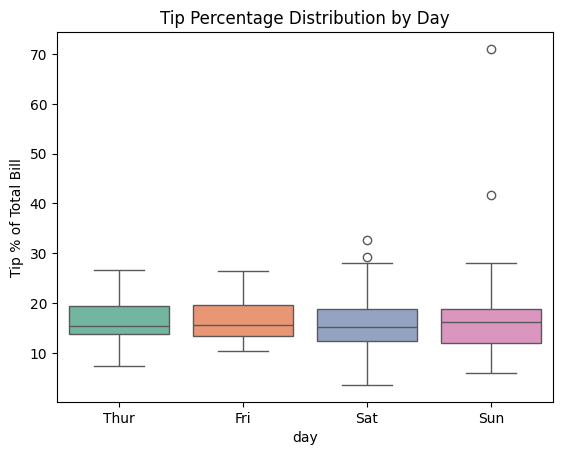

In [66]:
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
sns.boxplot(x='day', y='tip_percent', data=df, palette='Set2')
plt.title('Tip Percentage Distribution by Day')
plt.ylabel('Tip % of Total Bill')
plt.show()

# Insight:
On average, tips are slightly higher on Fridays and Saturdays,
suggesting better service or higher generosity on weekends.

# CONCLUSION
This project covered:
1. Data cleaning and validation
2. Descriptive statistics (mean, median, mode, spread)
3. Data visualization (pairplot, bar, hist, box, regression)
4. Probability concepts
5. Regression analysis and prediction
6. Freestyle analysis with insights

The seaborn 'tips' dataset demonstrated clear correlations and
patterns related to spending, tipping, and customer behavior.